# **Method**

1. Extract eReefs data from biogeochemical and hydrodynamic models

2. Plot variables across map of GBR

3. Plot variables across map of Lady Elliot Island

Add dependancies

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import os

from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (6,5)

In [2]:
# Define base directory
base_dir = "VariableMapping_Outputs"

# Define subfolders
folders = {
    "plots": os.path.join(base_dir, "plots"),
}

# Define nested folders 
heatmaps_folder = os.path.join(folders["plots"], "heat_maps")
os.makedirs(heatmaps_folder, exist_ok=True)

maps_folder = os.path.join(folders["plots"], "maps")
os.makedirs(maps_folder, exist_ok=True)

# Create all folders
for path in folders.values():
    os.makedirs(path, exist_ok=True)

# Step 1 - Extract eReefs Data

## **Hydrodynamic model**

In [3]:
# # GBR4 HYDRO 
url_hydro = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/gbr4_v4/daily.nc" 

ds_hydro = xr.open_dataset(url_hydro) 

ds_hydro

<xarray.Dataset> Size: 562GB
Dimensions:      (time: 4445, k: 17, latitude: 723, longitude: 491)
Coordinates:
    zc           (k) float64 136B ...
  * latitude     (latitude) float64 6kB -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude    (longitude) float64 4kB 142.2 142.2 142.2 ... 156.8 156.8 156.9
  * time         (time) datetime64[ns] 36kB 2010-08-31T14:00:00 ... 2022-10-3...
Dimensions without coordinates: k
Data variables:
    mean_cur     (time, k, latitude, longitude) float32 107GB ...
    salt         (time, k, latitude, longitude) float32 107GB ...
    temp         (time, k, latitude, longitude) float32 107GB ...
    u            (time, k, latitude, longitude) float32 107GB ...
    v            (time, k, latitude, longitude) float32 107GB ...
    mean_wspeed  (time, latitude, longitude) float32 6GB ...
    eta          (time, latitude, longitude) float32 6GB ...
    wspeed_u     (time, latitude, longitude) float32 6GB ...
    wspeed_v     (time, latitude, longitude) float32 6GB ...
Attributes: (12/22)
    Conventions:                   CF-1.0
    Parameter_File_Revision:       $Revision$
    Run_ID:                        4.0
    Run_code:                      SHOC grid|G3.00|H4.0|S-3.00|B0.00
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:    2025-06-13T15:26:28+10:00
    ...                            ...
    paramfile:                     /g/data/et4/projects/eReefs/gbr4_H4p0_ABAR...
    paramhead:                     eReefs GBR 4k grid, with Atmospheric forci...
    prefix_list_puv__:             https://w3id.org/env/puv#
    technical_guide_link:          https://nextcloud.eatlas.org.au/apps/share...
    technical_guide_publish_date:  2020-08-18
    title:                         eReefs AIMS-CSIRO GBR4 Hydrodynamic v4 dai...

## **Biogeochemical model**

In [4]:
#GBR BIO
url_bio = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily.nc?zc[0:1:16],latitude[0:1:722],longitude[0:1:490],Chl_a_sum[0:1:3072][0:1:16][0:1:722][0:1:490],time[0:1:3072]"

ds_bio = xr.open_dataset(url_bio) 

ds_bio

<xarray.Dataset> Size: 74GB
Dimensions:    (time: 3073, k: 17, latitude: 723, longitude: 491)
Coordinates:
    zc         (k) float64 136B ...
  * latitude   (latitude) float64 6kB -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude  (longitude) float64 4kB 142.2 142.2 142.2 ... 156.8 156.8 156.9
  * time       (time) datetime64[ns] 25kB 2010-12-01T02:00:00 ... 2019-04-30T...
Dimensions without coordinates: k
Data variables:
    Chl_a_sum  (time, k, latitude, longitude) float32 74GB ...
Attributes: (12/19)
    Conventions:                   CF-1.0
    NCO:                           netCDF Operators version 4.7.7 (Homepage =...
    RunID:                         2
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:    2021-09-07T22:58:30+10:00
    aims_ncaggregate_datasetId:    products__ncaggregate__ereefs__GBR4_H2p0_B...
    ...                            ...
    metadata_link:                 https://eatlas.org.au/data/uuid/61f3a6df-2...
    paramfile:                     /home/bai155/EMS_solar2/gbr4_H2p0_B3p1_Cb/...
    paramhead:                     eReefs 4 km grid. SOURCE Catchments with 2...
    technical_guide_link:          https://eatlas.org.au/pydio/public/aims-er...
    technical_guide_publish_date:  2020-08-18
    title:                         eReefs AIMS-CSIRO GBR4 BioGeoChemical 3.1 ...

Check dimension variables

In [5]:
# Hydrodynamic model
print(ds_hydro.time.min().values, ds_hydro.time.max().values)
print(ds_hydro.latitude.min().values, ds_hydro.latitude.max().values)
print(ds_hydro.longitude.min().values, ds_hydro.longitude.max().values)

2010-08-31T14:00:00.000000000 2022-10-31T14:00:00.000000000
-28.696022 -7.036022
142.168788 156.868788


In [6]:
# Biogeochemical model
print(ds_bio.time.min().values, ds_bio.time.max().values)
print(ds_bio.latitude.min().values, ds_bio.latitude.max().values)
print(ds_bio.longitude.min().values, ds_bio.longitude.max().values)

2010-12-01T02:00:00.000000000 2019-04-30T02:00:00.000000000
-28.696022 -7.036022
142.168788 156.868788


# Step 2 - Visualize GBR Maps

## **Plot Full Xarray Data**

*Chlorophyll*

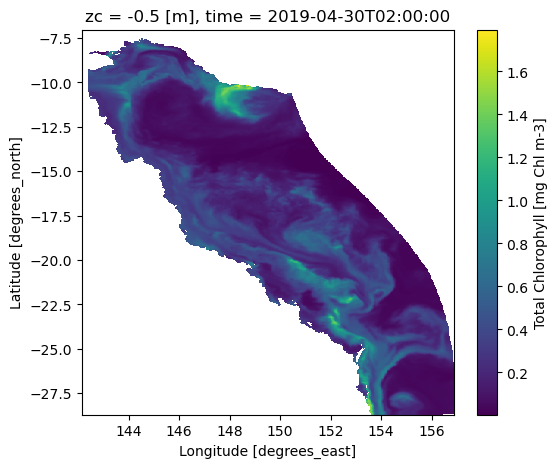

In [7]:
# Chlorophyll GBR map
ds_bio.Chl_a_sum.isel(time=-1,k=-1).plot()
plot_path = os.path.join(maps_folder, "chlorophyll_map.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

*Current Speed*

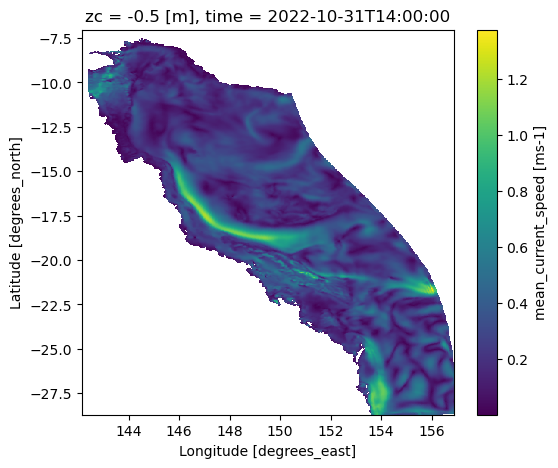

In [8]:
# Current speed GBR map
ds_hydro.mean_cur.isel(time=-1,k=-1).plot()
plot_path = os.path.join(maps_folder, "current_map.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

*Temperature*

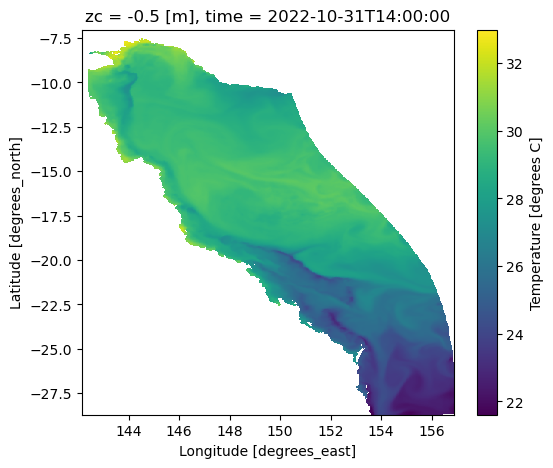

In [9]:
# Temperature GBR map
ds_hydro.temp.isel(time=-1,k=-1).plot()
plot_path = os.path.join(maps_folder, "temperature_map.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

*Wind Speed*

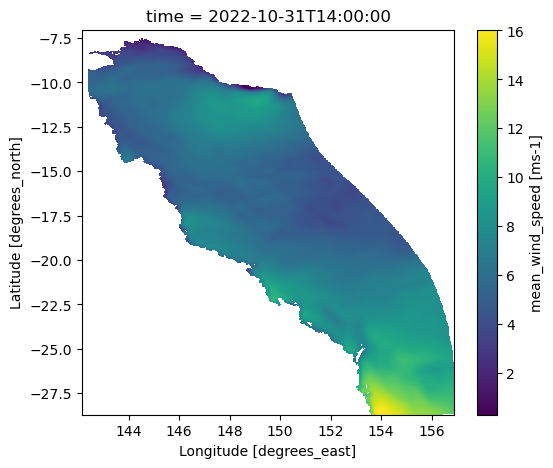

In [10]:
# Wind speed GBR map
ds_hydro.mean_wspeed.isel(time=-1).plot() # Wind measured at surface (no k value)
plot_path = os.path.join(maps_folder, "wind_map.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

*Salinity*

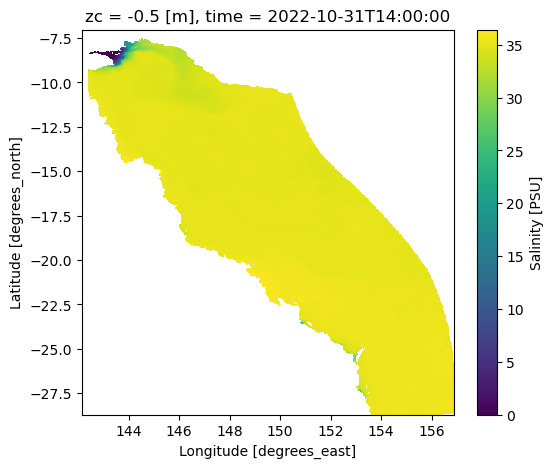

In [11]:
# Salinity GBR map
ds_hydro.salt.isel(time=-1,k=-1).plot() # Greater salinity range at depth (play around with k)
plot_path = os.path.join(maps_folder, "salinity_map.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

# Step 3 - Visualize Lady Elliot Maps 

### **Slice Xarray to Lady Elliot Island**

In [25]:
# Adjust figure size
plt.rcParams['figure.figsize'] = (8,6)

*Chlorophyll*

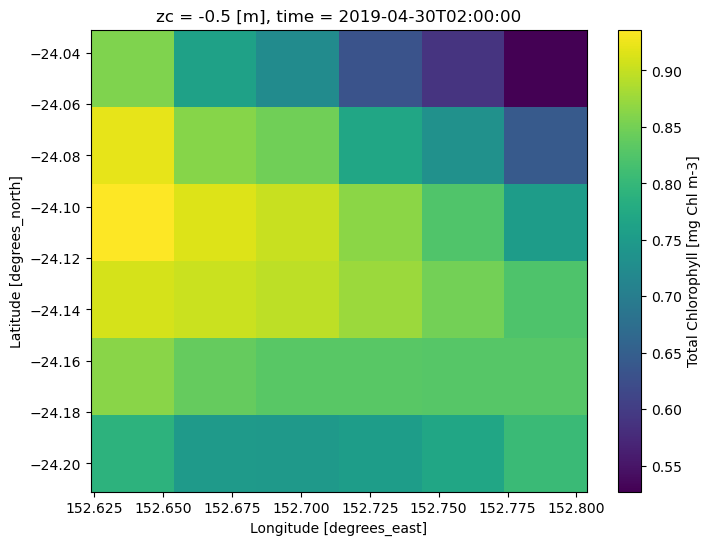

In [26]:
# Chlorophyll Lady Elliot Island map
ds_bio.Chl_a_sum.sel(longitude=slice(152.63,152.8), latitude=slice(-24.2,-24.03) ).isel(time=-1,k=-1).plot()
plot_path = os.path.join(heatmaps_folder, "chlorophyll_heatmap.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

*Current Speed*

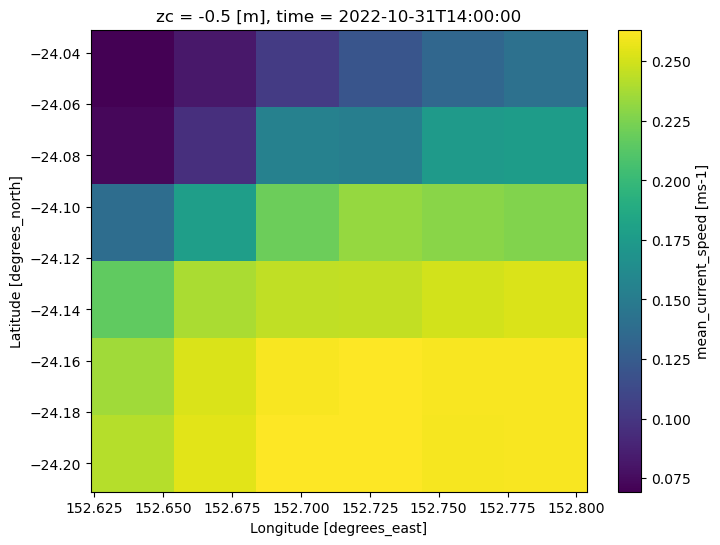

In [27]:
# Current speed Lady Elliot Island map
ds_hydro.mean_cur.sel(longitude=slice(152.63,152.8), latitude=slice(-24.2,-24.03) ).isel(time=-1,k=-1).plot()
plot_path = os.path.join(heatmaps_folder, "current_heatmap.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

*Wind Speed*

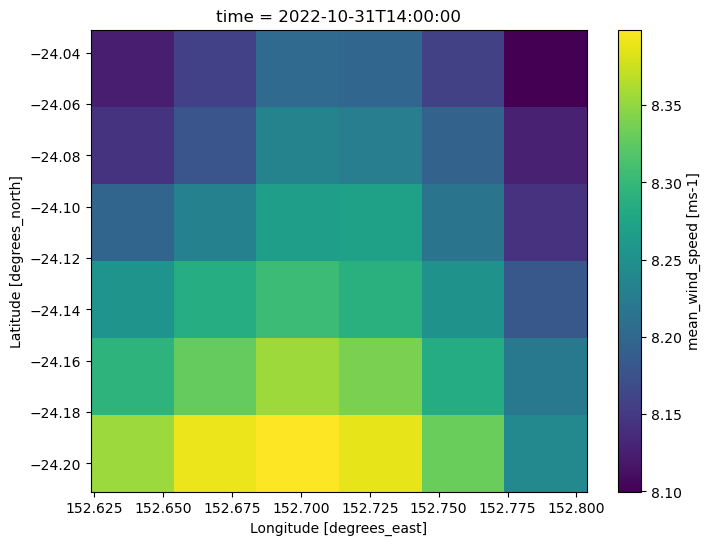

In [28]:
# Wind speed Lady Elliot Island map
ds_hydro.mean_wspeed.sel(longitude=slice(152.63,152.8), latitude=slice(-24.2,-24.03) ).isel(time=-1).plot()
plot_path = os.path.join(heatmaps_folder, "wind_heatmap.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

*Temperature*

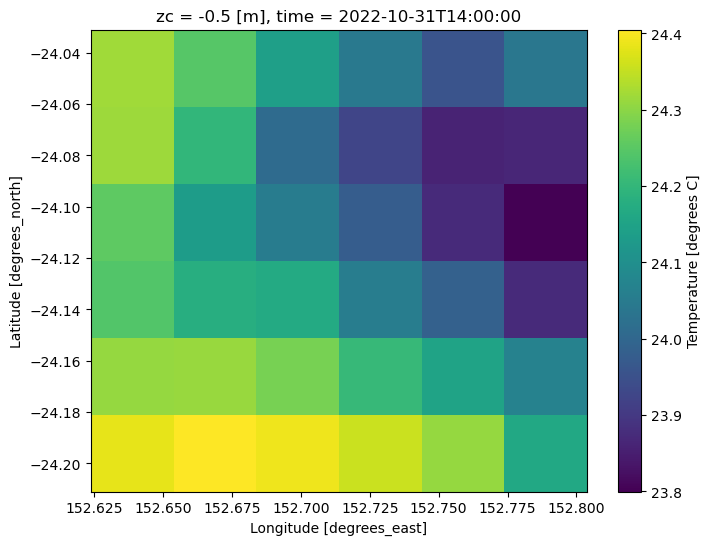

In [29]:
# Temperature Lady Elliot Island map
ds_hydro.temp.sel(longitude=slice(152.63,152.8), latitude=slice(-24.2,-24.03) ).isel(time=-1,k=-1).plot()
plot_path = os.path.join(heatmaps_folder, "temperature_heatmap.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

*Salinity*

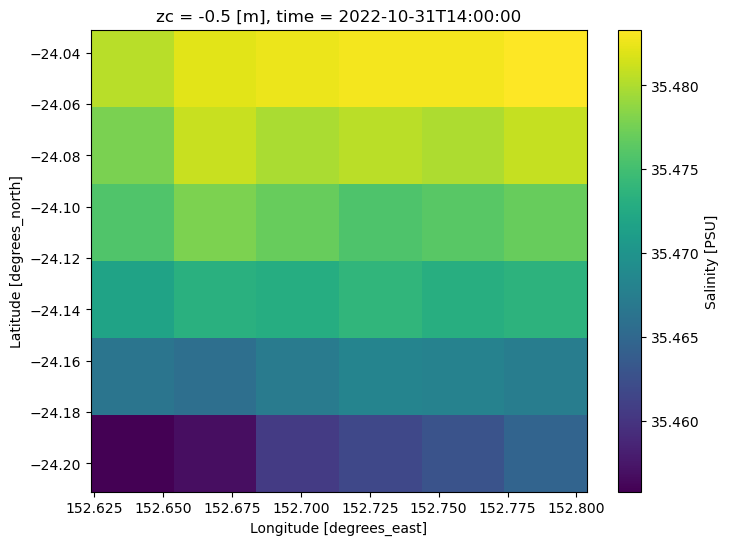

In [30]:
# Salinity Lady Elliot Island map
ds_hydro.salt.sel(longitude=slice(152.63,152.8), latitude=slice(-24.2,-24.03) ).isel(time=-1,k=-1).plot()
plot_path = os.path.join(heatmaps_folder, "salinity_heatmap.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()